<a href="https://colab.research.google.com/github/ailafelixa/Model-Breast-Cancer-Recurrence/blob/main/Aila_Modelo_TCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing packages



In [1]:
import pandas as pd
import numpy as np
!pip install dbfread
from dbfread import DBF
from copy import deepcopy
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importando os dados originais

In [3]:
path_all_data = '/content/drive/MyDrive/Graduação/Décimo semestre/TCC II/Raw data/PACI00-15/pacigeral.dbf'

In [4]:
raw_data = DBF(path_all_data, encoding='ISO8859-1', raw=True)

In [5]:
len(raw_data)

1149055

In [6]:
column_names = raw_data.field_names

In [7]:
print(column_names)

['ESCOLARI', 'IDADE', 'SEXO', 'UFNASC', 'UFRESID', 'IBGE', 'CIDADE', 'CATEATEND', 'DTCONSULT', 'CLINICA', 'DIAGPREV', 'DTDIAG', 'BASEDIAG', 'TOPO', 'TOPOGRUP', 'DESCTOPO', 'MORFO', 'DESCMORFO', 'EC', 'ECGRUP', 'T', 'N', 'M', 'PT', 'PN', 'PM', 'S', 'G', 'LOCALTNM', 'IDMITOTIC', 'PSA', 'GLEASON', 'OUTRACLA', 'META01', 'META02', 'META03', 'META04', 'DTTRAT', 'NAOTRAT', 'TRATAMENTO', 'TRATHOSP', 'TRATFANTES', 'TRATFAPOS', 'NENHUM', 'CIRURGIA', 'RADIO', 'QUIMIO', 'HORMONIO', 'TMO', 'IMUNO', 'OUTROS', 'NENHUMANT', 'CIRURANT', 'RADIOANT', 'QUIMIOANT', 'HORMOANT', 'TMOANT', 'IMUNOANT', 'OUTROANT', 'NENHUMAPOS', 'CIRURAPOS', 'RADIOAPOS', 'QUIMIOAPOS', 'HORMOAPOS', 'TMOAPOS', 'IMUNOAPOS', 'OUTROAPOS', 'DTULTINFO', 'ULTINFO', 'CONSDIAG', 'TRATCONS', 'DIAGTRAT', 'ANODIAG', 'CICI', 'CICIGRUP', 'CICISUBGRU', 'FAIXAETAR', 'LATERALI', 'INSTORIG', 'DRS', 'RRAS', 'PERDASEG', 'ERRO', 'DTRECIDIVA', 'RECNENHUM', 'RECLOCAL', 'RECREGIO', 'RECDIST', 'REC01', 'REC02', 'REC03', 'REC04', 'IBGEATEN', 'CIDO', 'DSC

### Filtrando dados a partir de 2018

In [8]:
# Specify the column name for which you want to list unique values
column_name = 'ANODIAG'

# Create a set to store unique values
unique_values = set()

# Iterate through the rows and collect unique values
for record in raw_data:
    unique_values.add(record[column_name])

# Print the different values
print(f"Different values in column '{column_name}':")
for value in unique_values:
    print(value)

Different values in column 'ANODIAG':
b'2005'
b'2014'
b'2006'
b'2012'
b'2023'
b'2017'
b'2010'
b'2020'
b'2008'
b'2009'
b'2016'
b'2022'
b'2013'
b'2018'
b'2007'
b'2000'
b'2002'
b'2011'
b'2003'
b'2021'
b'2015'
b'2019'
b'2001'
b'2004'


In [9]:
# Filtered records
filtered_records = [record for record in raw_data if 2018 <= int(record[column_name].decode('utf-8')) < 2023]

# Create a Pandas DataFrame from the filtered records
filtered_df = pd.DataFrame(filtered_records)

In [10]:
# Remove b' ' from all values in the DataFrame
filtered_df = filtered_df.applymap(lambda x: x.decode('latin-1') if isinstance(x, bytes) else x)

# Print the resulting DataFrame
filtered_df.head()

,ESCOLARI,IDADE,SEXO,UFNASC,UFRESID,IBGE,CIDADE,CATEATEND,DTCONSULT,CLINICA,...,REC02,REC03,REC04,IBGEATEN,CIDO,DSCCIDO,HABILIT,HABIT11,HABILIT1,HABILIT2
0,1,4,1,SP,SP,3536505,PAULINIA ...,2,20180323,25,...,,,,3509502,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,15,UNACON exclusiva de Oncologia Pedi trica com S...,2,1
1,1,1,1,SP,SP,3517604,GUAPIARA ...,1,20200904,25,...,,,,3552205,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,5,UNACON exclusiva de Oncologia Pedi trica ...,2,1
2,1,0,1,SP,SP,3550100,SAO MANUEL ...,2,20190905,28,...,,,,3507506,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,10,"UNACON com Servios de Radioterapia, de Hemato...",1,1
3,1,0,2,MT,SP,3549805,SAO JOSE DO RIO PRETO ...,2,20200812,25,...,,,,3549805,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,10,"UNACON com Servios de Radioterapia, de Hemato...",1,1
4,4,16,2,SP,SP,3550308,SAO PAULO ...,2,20190215,25,...,,,,3550308,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,7,CACON com Servio de Oncologia Pedi trica ...,3,2


In [11]:
df = deepcopy(filtered_df)

In [12]:
len(df) #Quantidade de linhas no dataset considerando apenas os anos de 2018, 2019, 2020, 2021 e 2022

251717

## Filtrando dataframe para retornar apenas casos de câncer de mama

A variável 'TOPOGRUP' contém a classificação CID-O (3a edição) para as neoplasias. Segundo o manual disponibilizado pela OMS, o grupo da topografia de câncer de mama é classificado pelo código C50.

In [13]:
df = df.loc[df['TOPOGRUP']== 'C50']

In [14]:
df['TOPOGRUP'].value_counts()

C50    34711
Name: TOPOGRUP, dtype: int64

## Análise exploratória

In [15]:
len(df)

34711

Após a filtragem específica para câncer de mama, ficamos com 34.711 registros

In [16]:
df['ANODIAG'].value_counts()

2019    8820
2018    8797
2020    6709
2021    6619
2022    3766
Name: ANODIAG, dtype: int64

A maior parte dos registros é de 2019, seguido por 2019, 2020, 2021 e 2022, o último com apenas 3766 registros.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34711 entries, 6 to 246087
Data columns (total 99 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ESCOLARI    34711 non-null  object
 1   IDADE       34711 non-null  object
 2   SEXO        34711 non-null  object
 3   UFNASC      34711 non-null  object
 4   UFRESID     34711 non-null  object
 5   IBGE        34711 non-null  object
 6   CIDADE      34711 non-null  object
 7   CATEATEND   34711 non-null  object
 8   DTCONSULT   34711 non-null  object
 9   CLINICA     34711 non-null  object
 10  DIAGPREV    34711 non-null  object
 11  DTDIAG      34711 non-null  object
 12  BASEDIAG    34711 non-null  object
 13  TOPO        34711 non-null  object
 14  TOPOGRUP    34711 non-null  object
 15  DESCTOPO    34711 non-null  object
 16  MORFO       34711 non-null  object
 17  DESCMORFO   34711 non-null  object
 18  EC          34711 non-null  object
 19  ECGRUP      34711 non-null  object
 20  T    

In [18]:
df['TOPO'].value_counts()

C504    8842
C509    8600
C508    7727
C502    2397
C500    2013
C501    1721
C505    1705
C503    1509
C506     197
Name: TOPO, dtype: int64

A topografia mais comum (8842 registros) é a C50.4, que se refere ao câncer de mama no quadrante superior externo da mama, seguido pelo C50.9 que se refere a glândula mamária. A topografia menos comum é a C50.6, onde o tumor se localiza no prolongamento axilar da mama

**C50 MAMA (exclui pele da mama C44.5)**

**C50.0 Mamilo**
Aréola

**C50.1 Porção central da mama**

**C50.2 Quadrante superior interno da mama**

**C50.3 Quadrante inferior interno da mama**

**C50.4 Quadrante superior externo da mama**

**C50.5 Quadrante inferior externo da mama**

**C50.6 Prolongamento axilar da mama**

**C50.8 Lesão sobreposta da mama**
(ver também nota página 61)
Linha média da mama
Mama externa
Mama inferior
Mama interna
Mama superior

**C50.9 Mama, SOE (exclui pele da mama
C44.5)**
Glândula mamária

### Distribuição de idade e sexo

#### Idade

In [19]:
df['IDADE'] = df['IDADE'].astype(int)

In [20]:
df['ANODIAG'] = df['ANODIAG'].astype(int)

In [21]:
df['SEXO'] = df['SEXO'].astype(int)

<Axes: xlabel='IDADE', ylabel='Count'>

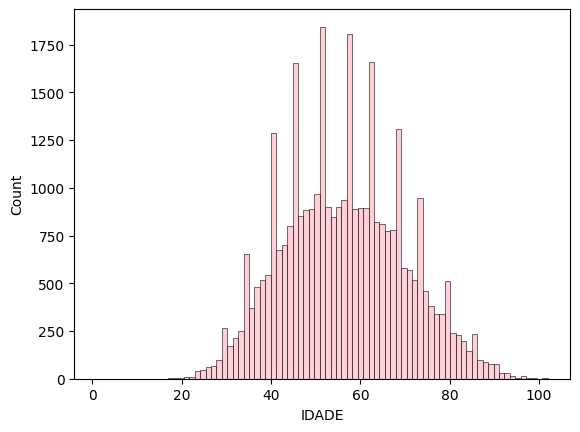

In [22]:
sns.histplot(x=df['IDADE'], color='pink')

A distribuição de idade parece seguir um padrão próximo a distribuição normal. Entretanto é relevante notar que existem alguns pontos em algumas faixas de idade onde a frequência é quase ou mais do que o dobro dos pontos ao redor. Um exemplo é o ponto ao redor dos 50 anos. Isso pode acontecer porque o screening obrigatório para câncer de mama começa aos 40 anos e as chances de câncer aumentam com a idade.

In [23]:
df['IDADE'].describe()

count    34711.000000
mean        56.297571
std         13.562862
min          1.000000
25%         46.000000
50%         56.000000
75%         66.000000
max        102.000000
Name: IDADE, dtype: float64

* A **média** de idade dos pacientes é de 56 anos, com um desvio padrão de 13 anos, ou seja, gira em torno de 43 a 69 anos.

* O **valor mínimo** é 1, o que pode ser um dado inserido incorretamente ou um caso de câncer infantil.

* A **idade máxima** foi 102 anos.

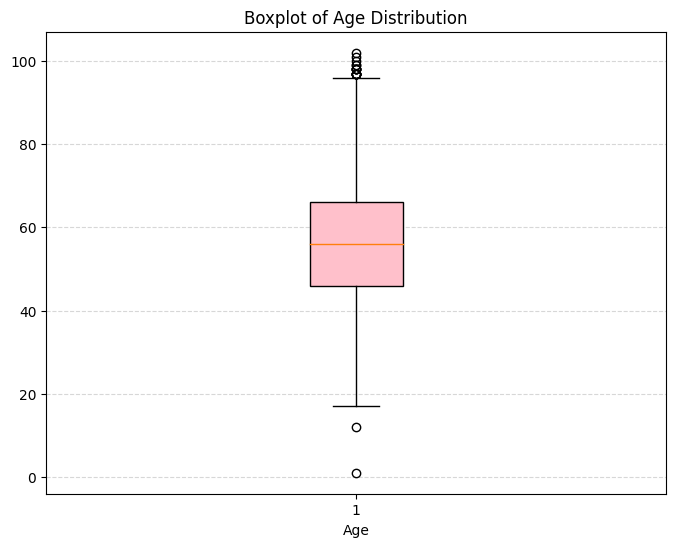

In [24]:
plt.figure(figsize=(8, 6))
bp = plt.boxplot(df['IDADE'], patch_artist=True)

for box in bp['boxes']:
    box.set(facecolor='pink')

plt.grid(axis='y', linestyle='--', linewidth=0.8, alpha=0.5)

plt.xlabel('Age')
plt.ylabel('')
plt.title('Boxplot of Age Distribution')

plt.show()

No boxplot é possível observar as informações descritas e que existem alguns outliers em idades < 20 e > 90, aproximadamente.

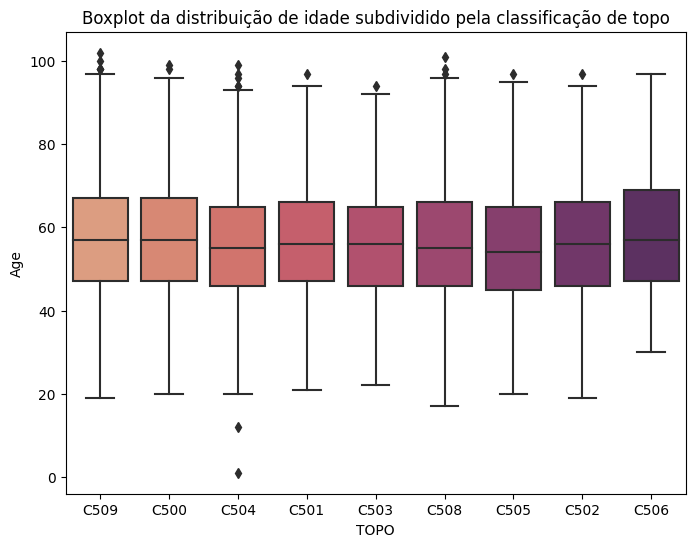

In [25]:
# Create a beautiful subdivided boxplot using sns.boxplot
plt.figure(figsize=(8, 6))  # Set figure size
sns.boxplot(x='TOPO', y='IDADE', data=df, palette="flare")

# Add labels and title
plt.xlabel('TOPO')
plt.ylabel('Age')
plt.title('Boxplot da distribuição de idade subdividido pela classificação de topo')

# Show the plot
plt.show()

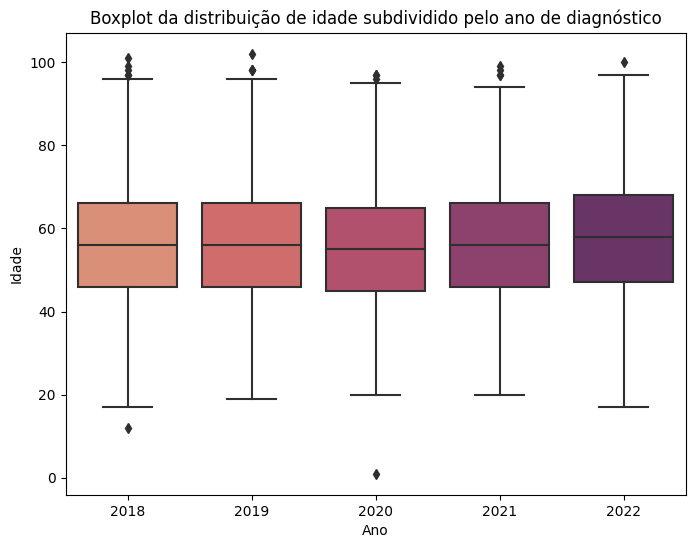

In [26]:
# Create a beautiful subdivided boxplot using sns.boxplot
plt.figure(figsize=(8, 6))  # Set figure size
sns.boxplot(x='ANODIAG', y='IDADE', data=df, palette="flare")

# Add labels and title
plt.xlabel('Ano')
plt.ylabel('Idade')
plt.title('Boxplot da distribuição de idade subdividido pelo ano de diagnóstico')

# Show the plot
plt.show()

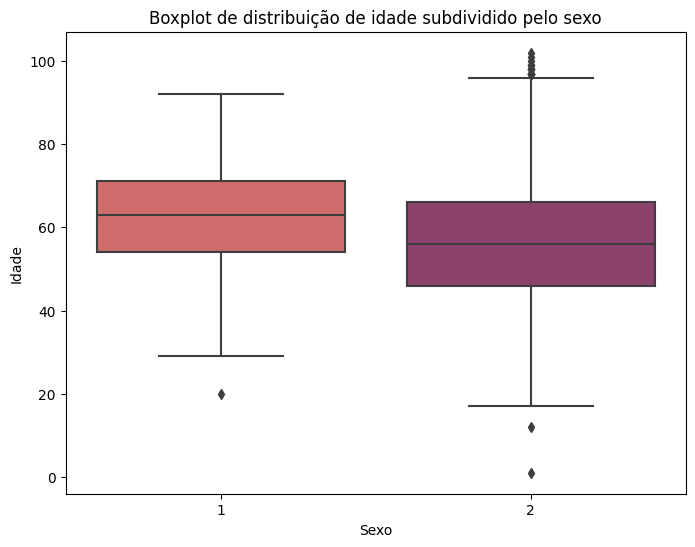

In [27]:
# Create a beautiful subdivided boxplot using sns.boxplot
plt.figure(figsize=(8, 6))  # Set figure size
sns.boxplot(x='SEXO', y='IDADE', data=df, palette="flare")

# Add labels and title
plt.xlabel('Sexo')
plt.ylabel('Idade')
plt.title('Boxplot de distribuição de idade subdividido pelo sexo')

# Show the plot
plt.show()

A idade parece ser similar entre os diferentes subtipos tumorais e os diferentes anos de diagnóstico incluidos. Comparando a distribuição de idade entre câncer de mama feminino e masculino, é possível ver que o câncer de mama masculino (1) em geral se manifesta em uma idade mais elevada.

#### Sexo

In [28]:
df['SEXO'] = df['SEXO'].astype(int)

<Axes: xlabel='SEXO', ylabel='Count'>

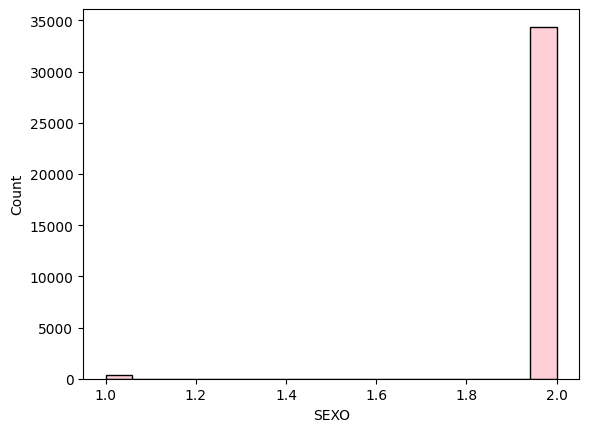

In [29]:
sns.histplot(x=df['SEXO'], color='pink')

In [33]:
df['SEXO'].value_counts()

2    34387
1      324
Name: SEXO, dtype: int64

Como esperado, a frequência para casos de câncer de mama no sexo feminino corresponde a maioria dos dados.

### Categoria de atendimento

1 - CONVENIO

2 - SUS

3 – PARTICULAR

9 – SEM INFORMAÇÃO

In [34]:
df['CATEATEND'] = df['CATEATEND'].astype(int)

In [35]:
df['CATEATEND'].value_counts()

2    27324
1     7172
3      215
Name: CATEATEND, dtype: int64

A grande maioria dos pacientes do banco de dados foram atendidos pelo SUS.

20% dos registros são de pacientes com convênio e menos de 1% são de pacientes com atendimento ao diagnóstico particular

### Qual o período médio entre o diagnóstico e a recidiva

### Frequência da variável alvo

Como queremos predizer a recidiva, nossa label será a variável 'RECNENHUM', que infoma se o paciente teve recidiva (1) ou se não teve recidiva (0)

In [36]:
df['RECNENHUM'] = df['RECNENHUM'].astype(int)

In [37]:
df['RECNENHUM'].value_counts()

1    32319
0     2392
Name: RECNENHUM, dtype: int64

Podemos ver que o dataset é altamente desbalanceado, com apenas cerca de 7% dos casos com recidiva e ~93% sem recidiva

Temos também as variáveis 'RECLOCAL', 'RECREGIO' e 'RECDIST' que informam se a recidiva foi local, regional ou a distância (metástase)

In [30]:
df['RECLOCAL'].value_counts()

0    34115
1      596
Name: RECLOCAL, dtype: int64

In [31]:
df['RECREGIO'].value_counts()

0    34507
1      204
Name: RECREGIO, dtype: int64

In [32]:
df['RECDIST'].value_counts()

0    32720
1     1991
Name: RECDIST, dtype: int64

A frequência de recidiva regional é bastante baixa. A frequência de recidiva a distância compreende a maior parte dos casos.